In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/체인화 편의점.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3210466 entries, 0 to 3210465
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      object
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(5), object(7)
memory usage: 318.4+ MB
None


In [4]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3210466 entries, 0 to 3210465
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      object
 1   CARD_SIDO_NM  object
 2   HOM_SIDO_NM   object
 3   AGE           object
 4   SEX_CTGO_CD   int64 
 5   FLC           int64 
 6   CSTMR_CNT     int64 
 7   AMT           int64 
 8   CNT           int64 
 9   year          int64 
 10  month         int64 
dtypes: int64(7), object(4)
memory usage: 293.9+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            1    1        205   
1   201901           강원          강원  10s            2    1        170   
2   201901           강원          강원  20s            1    1       4712   
3   201901           강원          강원  20s            1    2        487   
4   201901           강원          강원  20s            2    1       3036   

        AMT    CNT  year  month  
0   2563020    664 

In [6]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


CARD_SIDO_NM
세종      19162097510
제주     100865308766
울산     102397577893
대전     104218047190
전남     110272954906
충북     124931870634
광주     133369667552
전북     137778901990
강원     144823676480
경북     196305580345
충남     202457950852
대구     227585513613
인천     294259896365
경남     297051535394
부산     372830252996
서울    1322954744423
경기    1412693126284
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

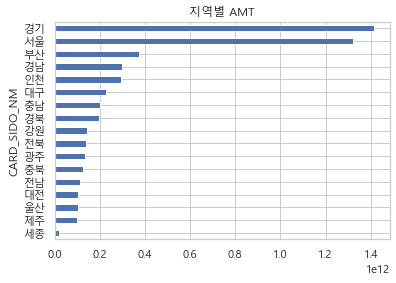

In [7]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    316314464923
201902    283482039151
201903    343297549867
201904    339368118284
201905    377219352474
201906    381391802266
201907    386928614266
201908    393665691278
201909    379784587604
201910    390499292135
201911    354838862914
201912    357253126551
202001    341725408491
202002    322618992908
202003    335570800081
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

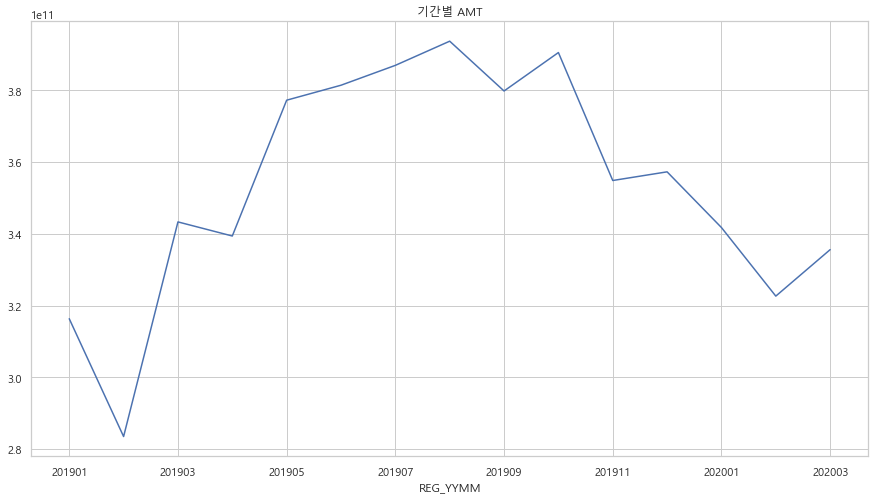

In [8]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

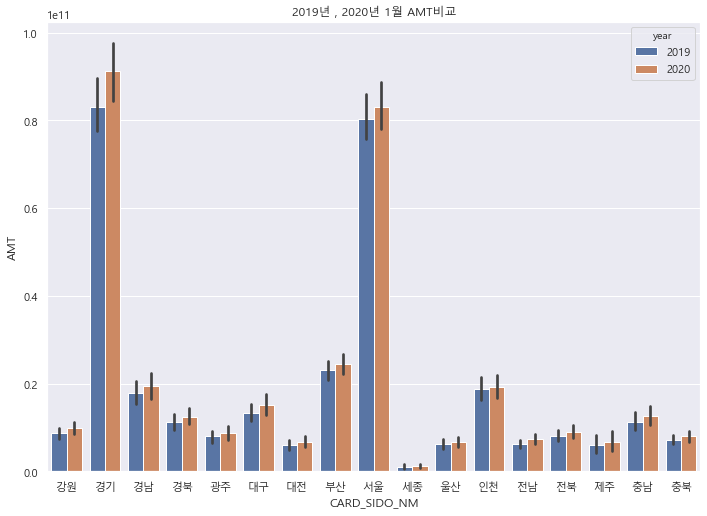

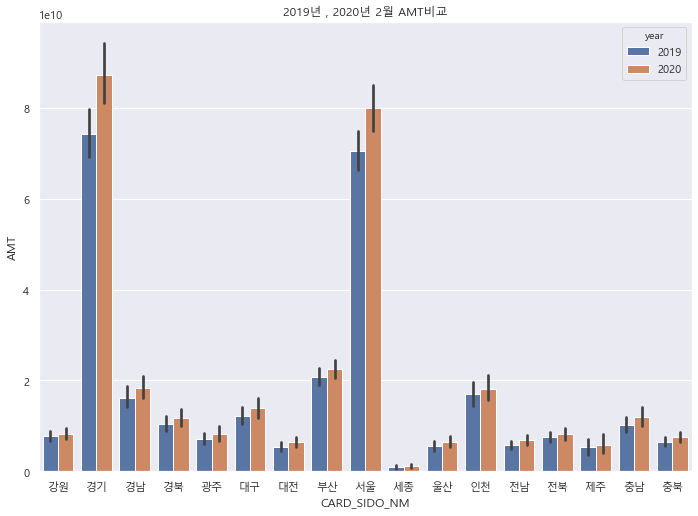

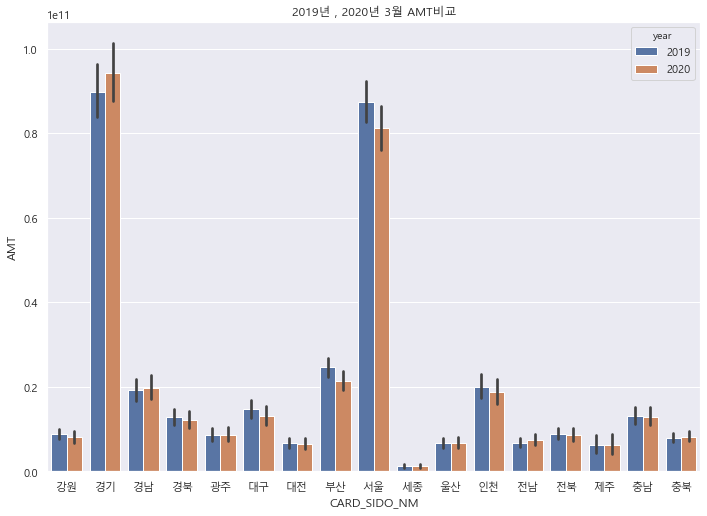

In [9]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

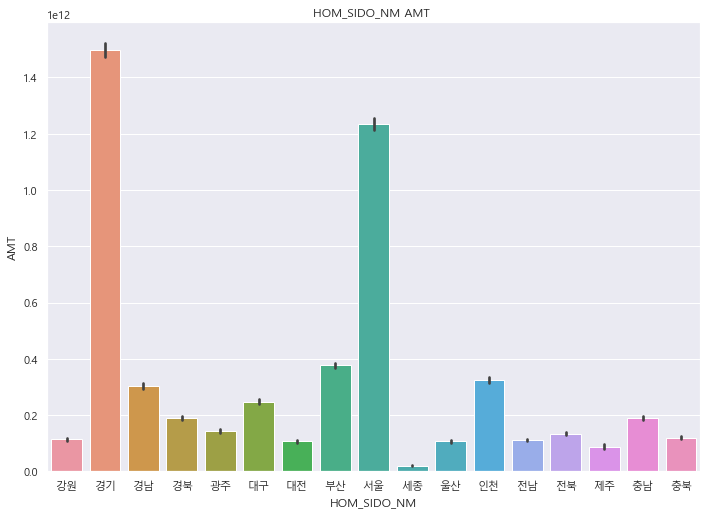

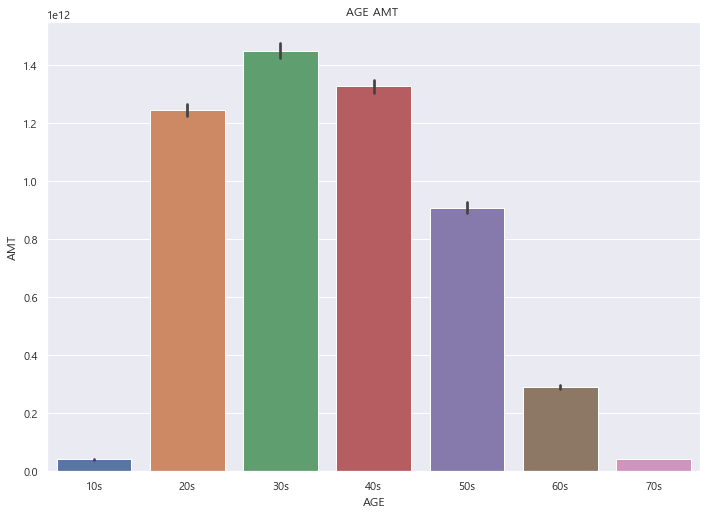

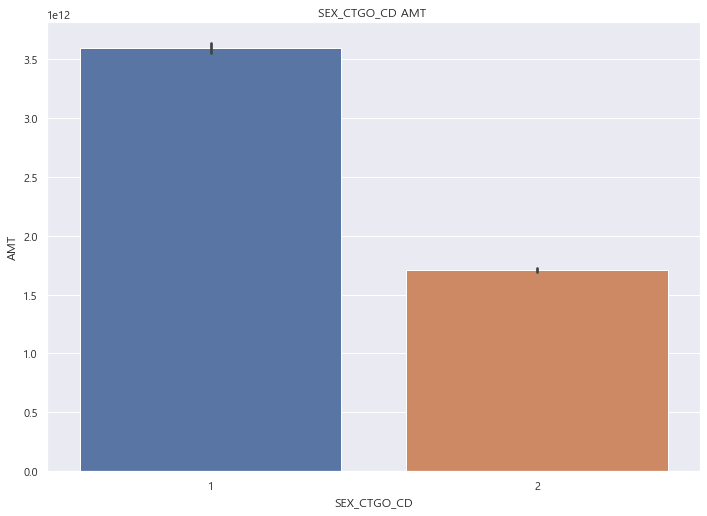

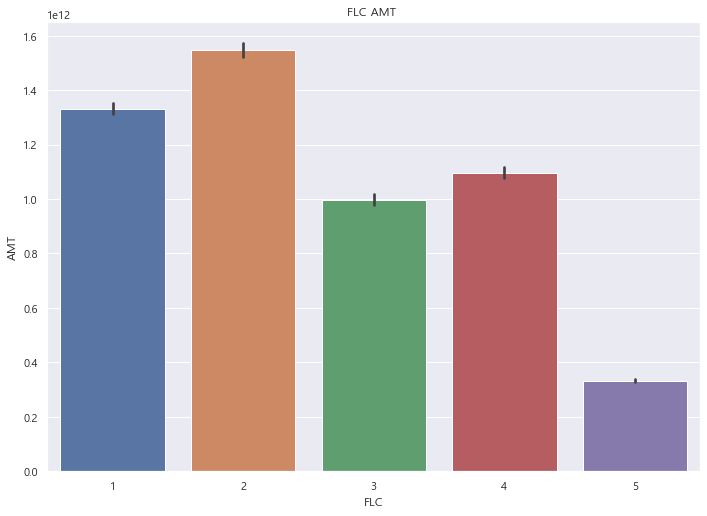

In [11]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()